In [ ]:
import pandas as pd
from google.colab import drive
df= pd.read_csv('/content/drive/MyDrive/iris.csv')

In [ ]:
print(df.head)

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>


In [ ]:
print(df.describe)

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>


In [ ]:
print(df.info)

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>


In [ ]:
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
print(df.duplicated().sum())

3


In [ ]:
print(df.size)

750


In [ ]:
from sklearn.datasets import load_iris
Iris=load_iris()
X=Iris.data
y=Iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=Iris.feature_names)
df['target'] = y

In [ ]:
# Display first 5 rows
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
# Dataset info
print("\nDataset shape:", df.shape)
print("\nTarget names:", Iris.target_names)

# Check class distribution
print("\nClass distribution:")
print(df['target'].value_counts())




Dataset shape: (150, 5)

Target names: ['setosa' 'versicolor' 'virginica']

Class distribution:
target
0    50
1    50
2    50
Name: count, dtype: int64


In [ ]:
# Split dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 105
Testing set size: 45


In [ ]:
# Build SVM model (linear kernel)
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

print("✅ Model training completed")


✅ Model training completed


In [ ]:
# Predictions on test data
y_pred = svm_model.predict(X_test)

# Show predictions
print("Sample Predictions:", y_pred[:10])
print("Actual Labels:    ", y_test[:10])


Sample Predictions: [2 1 2 1 2 2 1 1 0 2]
Actual Labels:     [2 1 2 1 2 2 1 1 0 2]


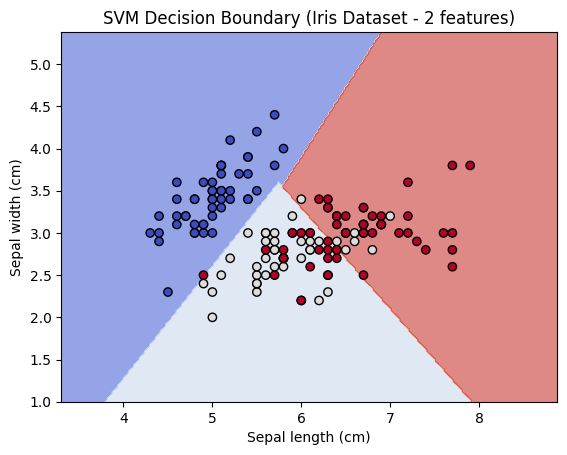

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Use only first 2 features (sepal length & sepal width)
X_2D = X[:, :2]

# Split again
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_2D, y, test_size=0.3, random_state=42, stratify=y
)

# Train SVM on 2D data
svm_model_2D = SVC(kernel='linear')
svm_model_2D.fit(X_train2, y_train2)

# Create mesh grid for plotting
x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm_model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm)
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("SVM Decision Boundary (Iris Dataset - 2 features)")
plt.show()
